# Markov regime switch model for financial time series

This notebook shows the implementation of the basic Markov regime switching model for the Brent oil time series. This variant of model analyse whether the time series are in high or low regime. Many econonomic and financial time series behaves differently in those two regimes, and thus it is useful to know in which regime the time series actualy are.

The notebook is using yfinance and is fully automatized, the analyzed asset can be easily changed with a different yfinance ticker.

In [1]:
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds


from datetime import date, timedelta
from matplotlib import pyplot
import numpy as np
import yfinanceng as yf        
import statsmodels.api as sm


import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

In [2]:
days_before=2500   #How many days back i want to download
start_date = (date.today()-timedelta(days=(days_before))).isoformat() 

In [3]:
yfinance_ticker='BZ=F'


#Standard yfinance does not work anymore, so it is needed to use yfinanceng package

brent=yf.download(yfinance_ticker, start=start_date)
brent=brent['Close']  #I want just closing prices

[*********************100%***********************]  1 of 1 completed


C:\Users\Marek\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


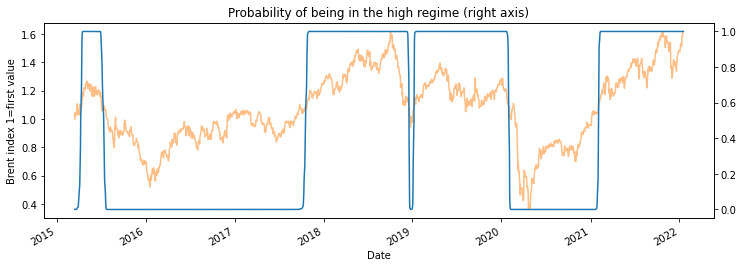

In [4]:
mod_brent = sm.tsa.MarkovRegression(brent, k_regimes=2)
res_brent = mod_brent.fit()


res_brent.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime (right axis)", figsize=(12,4), secondary_y=True)


brent=brent/brent.iloc[0]
brent.plot(alpha=0.5, ylabel="Brent index 1=first value")
pyplot.show()

The chart shows that Brent was in low regime since mid-2015 to q4 2017, then with one pause in high regime till the covid sell-off. After the covid recovery the Brent goes to high regime again.

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services. Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, author has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, freely availible at the time of publication. Author makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.